# Data Mining and Visualisation -- Lab 10

# In this lab, you will learn how to use PCA (Principal Component Analysis) to do dimension reduction for a dataset which has a high dimension. First, you will be given an example code obtained from the sklearn website. Then you should download the 'house-prices-advanced-regression-techniques' dataset from Aberdeen blackboard and follow the guide to do your own analysis.

Below is the example code from the sklearn website. Have a try on how to use PCA.

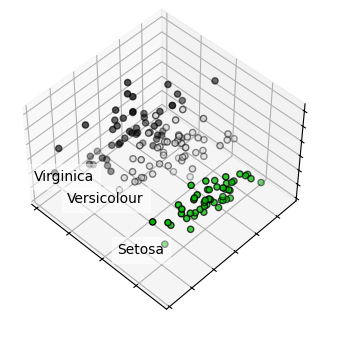

In [1]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

Fist you need to import some packages:

In [153]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Now download the dataset from blackboard and use pandas to load this dataset. The dataset is named as housedata.csv and its corresponding data description is named as housedata_description.txt.

In [159]:
house_data = pd.read_csv("./housedata.csv")

First remove the Id column from the df because it doesn't contain meaningful information.

In [160]:
house_df = house_data.drop(['Id'], axis=1)

How does the dataframe look like?

In [161]:
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# ToDos:
1. Check the meaning of each column's name.
2. There are many columns containing nan values. However, some nan are missing values but some are normal values.
3. For this lab, we simply drop those missing values.
4. Below I have provided for which columns we should drop rows containing nan. But why?

In [162]:
columns_to_drop_nan = ['LotFrontage','MasVnrArea','Electrical','FireplaceQu','GarageYrBlt']

# Question 1: How to drop rows that containing nan values ONLY for columns from columns_to_drop_nan?

In [163]:
# Your answer here:
df_cleaned = house_df.dropna(subset=columns_to_drop_nan)

How does your new dataframe look like now?

In [164]:
df_cleaned

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1451,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000


# Question 2: Except columns_to_drop_nan, there are many other columns containing nan. How to deal those columns?

Below is the code to show other columns containing nan as a list:

In [165]:
house_df.columns[house_df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

# Question 3: 
1. Select those columns from df_cleaned which have a datatype of int64 and float.
2. For these columns (from step 1), we don't need to process them, but for the rest of the columns that are not numerical values, we need to convert them using the dummy coding method.
3. Make a list of columns that contain those columns and you will apply the dummy coding method. Hint: You may want to use set.
4. Apply dummy coding to all targeted columns. Attention: Don't apply to ALL columns!

In [130]:
# Your answer here:

In [166]:
list(df_cleaned.select_dtypes(include=['int64', 'float']).columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [167]:
le = LabelEncoder()

all_columns = list(df_cleaned.columns)
value_columns = list(df_cleaned.select_dtypes(include=['int64', 'float']).columns)
columns_to_label = set(all_columns)-set(value_columns)
# Apply LabelEncoder to each categorical column
for column in columns_to_label:
    df_cleaned[column] = le.fit_transform(df_cleaned[column])

/var/folders/bs/0tcnx2l943l399nzqkkvtkh00000gn/T/ipykernel_4177/1829724226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = le.fit_transform(df_cleaned[column])
/var/folders/bs/0tcnx2l943l399nzqkkvtkh00000gn/T/ipykernel_4177/1829724226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = le.fit_transform(df_cleaned[column])
/var/folders/bs/0tcnx2l943l399nzqkkvtkh00000gn/T/ipykernel_4177/1829724226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

How does your new dataframe look like now?

In [168]:
df_cleaned

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,3,0,5,2007,7,3,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,3,0,9,2008,7,3,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,3,0,2,2006,7,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,3,0,12,2008,7,3,250000
6,20,3,75.0,10084,1,2,3,3,0,4,...,0,3,4,3,0,8,2007,7,3,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,3,80.0,10000,1,2,3,3,0,4,...,0,3,4,3,0,12,2007,7,3,240000
1451,20,3,78.0,9262,1,2,3,3,0,4,...,0,3,4,3,0,5,2009,6,4,287090
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,3,4,3,0,8,2007,7,3,175000
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,3,2,3,0,2,2010,7,3,210000


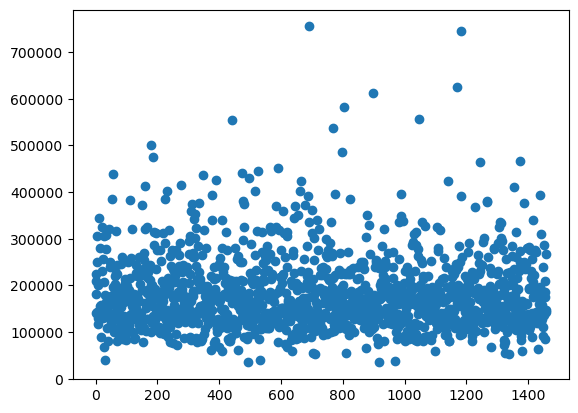

In [169]:
plt.scatter(np.arange(len(house_data["SalePrice"])),house_data["SalePrice"])

# Question 4: Based on your latest dataframe, take all values of 'SalePrice' as Y and all other columns as X. Then transform X into numpy format. Use the train_test_split from sklearn to split the dataset into training set and testing set.

In [131]:
# Your answer here:

In [170]:
train, test = train_test_split(df_cleaned, test_size=0.2)

In [171]:
y = list(train['SalePrice'])
x = train.drop(['SalePrice'], axis=1)

In [172]:
x.to_numpy()

array([[  30.,    4.,   60., ..., 2010.,    7.,    0.],
       [  20.,    3.,   78., ..., 2006.,    7.,    3.],
       [ 120.,    3.,   61., ..., 2007.,    7.,    3.],
       ...,
       [  75.,    3.,  174., ..., 2006.,    7.,    0.],
       [ 120.,    3.,   53., ..., 2006.,    6.,    4.],
       [  20.,    3.,   70., ..., 2010.,    7.,    3.]])

# Below is the code using a simple BayesianRidge model to predict y based on x. 

How you can use BayesianRide:

In [133]:
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)
reg.predict([[1, 0.]])

array([0.50000013])

# Question 5: How to use BayesianRidge to predict the house price?

In [173]:
# Your answer here:
reg = linear_model.BayesianRidge()
reg.fit(x.to_numpy(), y)

BayesianRidge()

In [176]:
pre_y = reg.predict(x.to_numpy())

In [177]:
format(np.mean(y-pre_y),'.10f')

'0.0000000002'

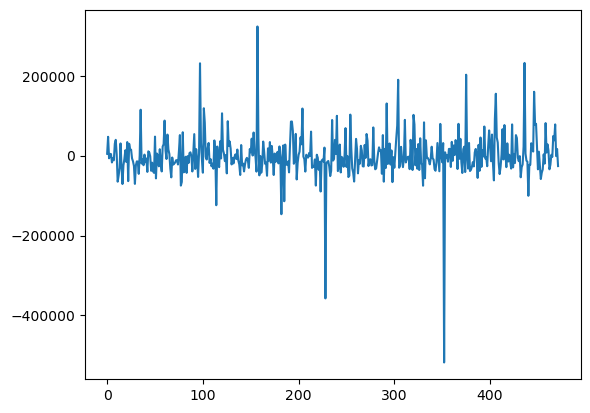

In [178]:
plt.plot(np.arange(len(y)), y-pre_y)

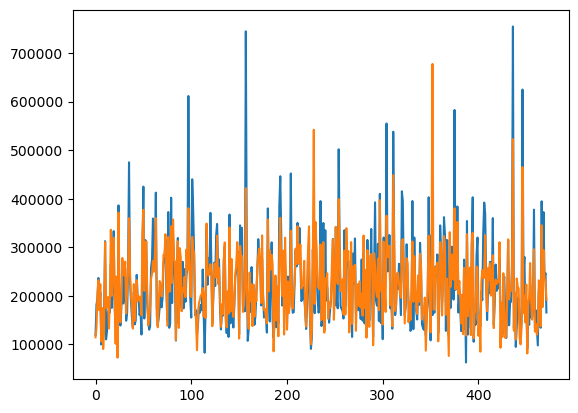

In [179]:
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(y)), pre_y)

# Q6: Use the testing set to examine the performance of the trained model. What is the average difference between the predicted price and the actual price?

In [180]:
y_test = list(test['SalePrice'])
x_test = test.drop(['SalePrice'], axis=1)
pre_y_test = reg.predict(x_test.to_numpy())

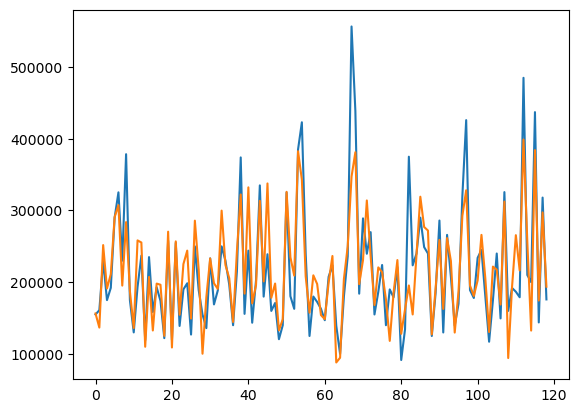

In [181]:
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), pre_y_test)

In [182]:
format(np.mean(y_test-pre_y_test),'.10f')

'-898.3093901251'

In [183]:
x_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
482,70,4,50.0,2500,1,1,3,3,0,0,...,0,0,3,4,3,0,6,2009,7,3
508,70,4,60.0,9600,1,2,3,3,0,4,...,0,0,3,4,3,0,10,2008,7,3
22,20,3,75.0,9742,1,2,3,3,0,4,...,0,0,3,4,3,0,9,2008,7,3
558,60,3,57.0,21872,1,2,1,1,0,2,...,0,0,3,4,3,0,8,2008,7,3
1430,60,3,60.0,21930,1,2,2,3,0,4,...,0,0,3,4,3,0,7,2006,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,70,3,54.0,7588,1,2,3,3,0,4,...,0,0,3,4,3,0,7,2006,7,3
349,60,3,56.0,20431,1,2,1,3,0,4,...,0,0,3,4,3,0,4,2006,6,4
206,20,3,40.0,13673,1,2,0,3,0,1,...,0,0,3,4,3,0,3,2007,7,3
1115,20,3,93.0,12085,1,2,3,3,0,4,...,0,0,3,4,3,0,11,2007,6,4


# Suppose that you have more than 1 billion house records and you have very limited computational resources. Hence, you cannot deal with samples with so many features (now each house has 79 features). 

In [187]:
merge_feature = np.concatenate((x.to_numpy(), x_test.to_numpy()))

In [189]:
merge_feature.shape

(591, 79)

# Question 7: Please use PCA to reduce the dimension of features to solve the computational issue.
1. Perform the PCA function introduced at the beginning to reduce the merged features into a dimension of 10.
2. Is the average accuracy becoming higher or lower?
3. If you are required to decide the number of dimensions to keep and you want the accuracy to be within 30 of the original data. How many dimensions you can keep?

In [190]:
pca = decomposition.PCA(n_components=10)
pca.fit(x.to_numpy())
reduced_features_train = pca.transform(x.to_numpy())
reduced_features_test = pca.transform(x_test.to_numpy())

In [191]:
reg = linear_model.BayesianRidge()
reg.fit(reduced_features_train, y)

BayesianRidge()

'1030.6719712107'

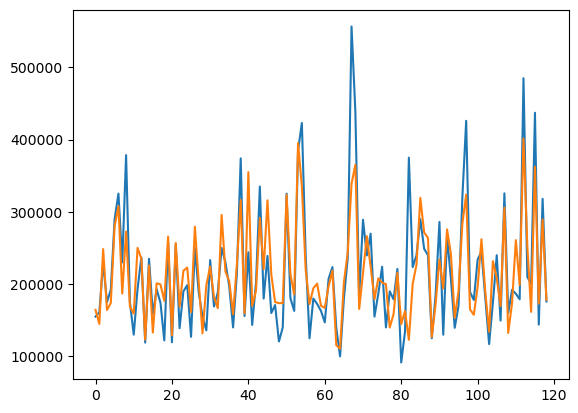

In [195]:
pre_y = reg.predict(reduced_features_train)
format(np.mean(y-pre_y),'.10f')

pre_y_test = reg.predict(reduced_features_test)

plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), pre_y_test)
format(np.mean(y_test-pre_y_test),'.10f')

In [202]:
for i in [ 25, 26, 27, 28, 29, 30]:
    pca = decomposition.PCA(n_components=i)
    pca.fit(x.to_numpy())
    reduced_features_train = pca.transform(x.to_numpy())
    reduced_features_test = pca.transform(x_test.to_numpy())

    reg = linear_model.BayesianRidge()
    reg.fit(reduced_features_train, y)
    
    pre_y = reg.predict(reduced_features_train)
    format(np.mean(y-pre_y),'.10f')
    
    pre_y_test = reg.predict(reduced_features_test)
    
    # plt.plot(np.arange(len(y_test)), y_test)
    # plt.plot(np.arange(len(y_test)), pre_y_test)
    print(format(np.abs(np.mean(y_test-pre_y_test))-np.abs(-898.3093901251),'.10f'))

-55.9359613835
-55.2447277027
-35.2638062695
-35.6980936372
-24.1050087219
-24.9945057697
